**Dylan Govender - 221040222 - COMP703 - HMM POS-Tagger**

**Initialising the Dataset**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
!cp '/content/gdrive/My Drive/Colab Notebooks/isiswati_pos_tagging_corpus.txt' 'isiswati_pos_tagging_corpus.txt'

In [15]:
filename = '/content/isiswati_pos_tagging_corpus.txt'
corpus = []
tokenized_text = []
tokenized_sent = []
with open(filename, "r") as file:
    for line in file:
        line_data = line.split()
        if len(line_data) == 5:
            corpus.append(line_data)
            tokenized_sent.append((line_data[0], line_data[4]))
            #tokenized_sent.append((line_data[0], line_data[2], line_data[3], line_data[4]))
            if line_data[0] == '.':
                tokenized_text.append(tokenized_sent)
                tokenized_sent = []

print(tokenized_text[:1])
print("Number of sentences:", str(len(tokenized_text)))

[[('Ngetulu', 'ADV'), ('kwaloko', 'POSS'), (',', 'PUNC'), ('kuba', 'V'), ('khona', 'CONJ'), ('kuniketela', 'V'), ('kwekwakhiwa', 'POSS'), ('kwemaKomidi', 'POSS'), ('emaWadi', 'N'), (',', 'PUNC'), ('njengemitimba', 'ADV'), ('yamasipala', 'POSS'), ('lelulekako', 'POSS'), ('kanye', 'ADV'), ('nalabamele', 'ADV'), ('ummango', 'N'), ('kute', 'CONJ'), ('kuhanjiswe', 'V'), ('tidzingo', 'N'), ('netiphakamiso', 'ADV'), ('temmango', 'POSS'), ('kumkhandlu', 'N'), ('.', 'PUNC')]]
Number of sentences: 2682


**Checking if the data has been fully captured by the above preprocess.**

In [16]:
import pandas as pd
df = pd.DataFrame(corpus)
df.columns = ['token', 'morph_analysis', 'lemma', 'xpos', 'upos']
df.head()

,token,morph_analysis,lemma,xpos,upos
0,Ngetulu,nga[AdvPre]-tulu[Adv],tulu,ADV,ADV
1,kwaloko,kwa[PossConc15]-loko[Dem15][Pos2],loko,POSS15,POSS
2,",",",[Punc]",",",PUNC,PUNC
3,kuba,ku[BPre15]-b[VRoot]-a[VerbTerm],ba,V,V
4,khona,khona[Conj],khona,CONJ,CONJ


In [17]:
df.describe()

,token,morph_analysis,lemma,xpos,upos
count,42977,42977,42977,42977,42977
unique,14060,15379,2930,99,16
top,.,.[Punc],.,V,N
freq,2682,2682,2682,7094,9331


**HMM Data-Preprocessing and Training the HMM for POS-Tagging**


In [20]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = train_test_split(tokenized_text, shuffle=True, test_size=0.2) #cross validation

HmmModel = nltk.HiddenMarkovModelTagger.train(X)

y_test = [tag for sentence in y for token, tag in sentence]
y_pred = []
for sentence in y:
    y_pred += [tag for _, tag in HmmModel.tag([word for word, _ in sentence])]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ABBR       0.59      0.62      0.61        16
         ADJ       0.96      0.88      0.92       114
         ADV       0.86      0.66      0.74      1074
        CDEM       0.68      0.70      0.69       123
        CONJ       0.76      0.87      0.81       470
         COP       0.86      0.30      0.44       100
         FOR       0.01      0.42      0.03        12
        IDEO       1.00      0.50      0.67         4
         INT       0.90      0.50      0.64        52
           N       0.83      0.82      0.83      1840
         NUM       1.00      0.75      0.86        40
        POSS       0.76      0.76      0.76      1376
         PRO       0.61      0.79      0.69        85
        PUNC       0.77      1.00      0.87      1143
         REL       0.70      0.50      0.58       698
           V       0.80      0.71      0.75      1466

    accuracy                           0.76      8613
   macro avg       0.76   

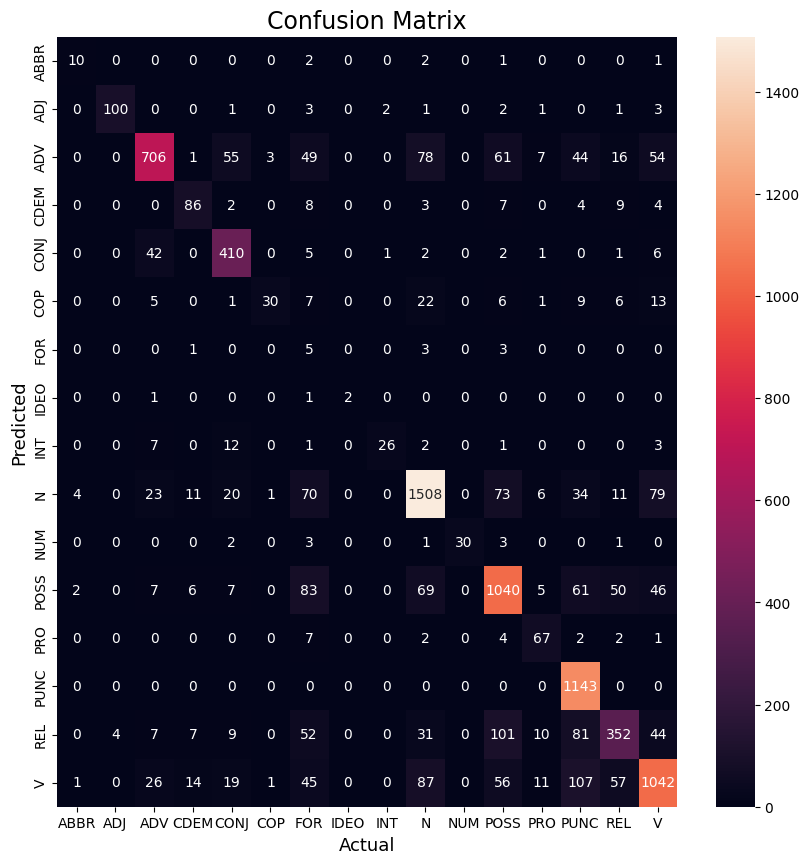

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lines = classification_report(y_test, y_pred).strip().split('\n')[2:-4]
tags = [line.split()[0] for line in lines]

plt.figure(figsize=(10, 10))
plt.title('Confusion Matrix',fontsize=17)
sb.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            xticklabels=tags,
            yticklabels=tags)
plt.ylabel('Predicted',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

In [22]:
print("Accuracy:", HmmModel.accuracy(y))
print("F1-Score:", str(float(classification_report(y_test, y_pred).split("\n")[4].split()[-2])))

Accuracy: 0.7612910716358993
F1-Score: 0.74
